### **Dados utilizados:**

- **`ID`**:
    - **Descri√ß√£o:**¬†Identificador √∫nico para cada cliente.
- **`Tipo de empresa`**:
    - **Descri√ß√£o:**¬†Categoria da empresa, como MEI, ME, EPP, etc.
- **`Funda√ß√£o da empresa`**:
    - **Descri√ß√£o:**¬†Ano de funda√ß√£o da empresa.
- **`Possui mais de um s√≥cio`**:
    - **Descri√ß√£o:**¬†Indica se a empresa possui mais de um s√≥cio (Sim/N√£o).
- **`Funcion√°rios`**:
    - **Descri√ß√£o:**¬†N√∫mero de funcion√°rios na empresa.
- **`Meses de perman√™ncia`** :
    - **Descri√ß√£o:**¬†Quantidade de meses que o cliente permaneceu ativo.
- **`Utiliza servi√ßos financeiros`**:
    - **Descri√ß√£o:**¬†Indica se a empresa utiliza servi√ßos financeiros (Sim/N√£o).
- **`PossuiContador`**:
    - **Descri√ß√£o:**¬†Indica se a empresa possui contador (Sim/N√£o).
- **`Faz concilia√ß√£o banc√°ria`**:
    - **Descri√ß√£o:**¬†Indica se a empresa realiza concilia√ß√£o banc√°ria (Sim/N√£o).
- **`Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo financeiro`**:
    - **Descri√ß√£o:**¬†Frequ√™ncia de utiliza√ß√£o do m√≥dulo financeiro do sistema.
- **`Frequ√™ncia de utiliza√ß√£o de feature do sistema: Emiss√£o de nota fiscal`**:
    - **Descri√ß√£o:**¬†Frequ√™ncia de utiliza√ß√£o da emiss√£o de nota fiscal no sistema.
- **`Frequ√™ncia de utiliza√ß√£o de feature do sistema: Integra√ß√£o banc√°ria`**:
    - **Descri√ß√£o:**¬†Frequ√™ncia de utiliza√ß√£o da integra√ß√£o banc√°ria no sistema.
- **`Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo de vendas`**:
    - **Descri√ß√£o:**¬†Frequ√™ncia de utiliza√ß√£o do m√≥dulo de vendas no sistema.
- **`Frequ√™ncia de utiliza√ß√£o de feature do sistema: Relat√≥rios`**:
    - **Descri√ß√£o:**¬†Frequ√™ncia de utiliza√ß√£o de relat√≥rios no sistema.
- **`Frequ√™ncia de utiliza√ß√£o de feature do sistema: Utiliza√ß√£o de APIs de integra√ß√£o`**:
    - **Descri√ß√£o:**¬†Frequ√™ncia de utiliza√ß√£o de APIs de integra√ß√£o no sistema.
- **`Contrato`**:
    - **Descri√ß√£o:**¬†Tipo de contrato com o cliente.
- **`Emite boletos`**:
    - **Descri√ß√£o:**¬†Indica se a empresa emite boletos (Sim/N√£o).
- **`Tipo de pagamento`**:
    - **Descri√ß√£o:**¬†M√©todo de pagamento utilizado pelo cliente.
- **`Receita mensal`**:
    - **Descri√ß√£o:**¬†Receita mensal gerada pelo cliente.
- **`Receita total`**:
    - **Descri√ß√£o:**¬†Receita total gerada pelo cliente.
- **`Churn`**:
    - **Descri√ß√£o:**¬†Indica se houve churn (cancelamento) do cliente (Sim/N√£o).


In [1]:
# Bibliotecas principais
import math
import pandas as pd
import numpy as np
import re, unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.dummy import DummyClassifier
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

from sklearn.metrics import (
    roc_curve, auc, RocCurveDisplay,
    precision_recall_curve, average_precision_score,
    PrecisionRecallDisplay
)

from sklearn.utils.class_weight import compute_sample_weight

In [2]:
df = pd.read_excel("C:\\Projetos Pessoais\\Churn_Prediction\\customer_churn_data.xlsx")
df.head()

ID  Tipo de empresa  Funda√ß√£o da empresa Possui mais de um s√≥cio  \
0   1    Micro empresa                 2016                     Sim   
1   2  Pequena empresa                 2018                     N√£o   
2   3  Pequena empresa                 2021                     N√£o   
3   4  Pequena empresa                 2016                     N√£o   
4   5    Micro empresa                 2017                     N√£o   

         Funcion√°rios  Meses de perman√™ncia  Utiliza servi√ßos financeiros  \
0  at√© 5 funcion√°rios                      1                          N√£o   
1  at√© 5 funcion√°rios                     34                          Sim   
2  at√© 5 funcion√°rios                      2                          Sim   
3  at√© 5 funcion√°rios                     45                          N√£o   
4  at√© 5 funcion√°rios                      2                          Sim   

  PossuiContador Faz concilia√ß√£o banc√°ria  \
0            NaN               autom√°tica   
1           N√£o                autom√°tica   
2           N√£o                autom√°tica   
3            NaN               autom√°tica   
4           N√£o                    manual   

  Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo financeiro  ...  \
0                                          Pouco uso                 ...   
1                                      Uso frequente                 ...   
2                                      Uso frequente                 ...   
3                                      Uso frequente                 ...   
4                                          Pouco uso                 ...   

  Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo de vendas  \
0                                          Pouco uso                 
1                                          Pouco uso                 
2                                          Pouco uso                 
3                                      Uso frequente                 
4                                          Pouco uso                 

  Frequ√™ncia de utiliza√ß√£o de feature do sistema: Relat√≥rios  \
0                                          Pouco uso           
1                                          Pouco uso           
2                                          Pouco uso           
3                                          Pouco uso           
4                                          Pouco uso           

  Frequ√™ncia de utiliza√ß√£o de feature do sistema: Utiliza√ß√£o de APIs de integra√ß√£o  \
0                                          Pouco uso                                 
1                                          Pouco uso                                 
2                                          Pouco uso                                 
3                                          Pouco uso                                 
4                                          Pouco uso                                 

     Contrato Emite boletos Emite boletos.1  \
0   M√™s-a-m√™s             1             Yes   
1  Trimestral             0              No   
2   M√™s-a-m√™s             1             Yes   
3  Trimestral             0              No   
4   M√™s-a-m√™s             1             Yes   

                     Tipo de pagamento Receita mensal Receita total  Churn  
0             Boleto - pagamento √∫nico          29.85         29.85    N√£o  
1                   Boleto - m√™s a m√™s          56.95       1889.50    N√£o  
2                   Boleto - m√™s a m√™s          53.85        108.15    Sim  
3  Cart√£o de cr√©dito - pagamento √∫nico          42.30       1840.75    N√£o  
4             Boleto - pagamento √∫nico          70.70        151.65    Sim  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   ID                                                                                7043 non-null   int64  
 1   Tipo de empresa                                                                   7043 non-null   object 
 2   Funda√ß√£o da empresa                                                               7043 non-null   int64  
 3   Possui mais de um s√≥cio                                                           7043 non-null   object 
 4   Funcion√°rios                                                                      7043 non-null   object 
 5   Meses de perman√™ncia                                                              7043 non-null   int64  


In [4]:
df.describe()

ID  Funda√ß√£o da empresa  Meses de perman√™ncia   Emite boletos  \
count  7043.000000          7043.000000            7043.000000    7043.000000   
mean   3522.000000          2016.736476              32.371149       0.592219   
std    2033.283305             4.582311              24.559481       0.491457   
min       1.000000          2001.000000               0.000000       0.000000   
25%    1761.500000          2016.000000               9.000000       0.000000   
50%    3522.000000          2018.000000              29.000000       1.000000   
75%    5282.500000          2020.000000              55.000000       1.000000   
max    7043.000000          2021.000000              72.000000       1.000000   

       Receita mensal  Receita total  
count     7043.000000    7032.000000  
mean        64.761692    2283.300441  
std         30.090047    2266.771362  
min         18.250000      18.800000  
25%         35.500000     401.450000  
50%         70.350000    1397.475000  
75%         89.850000    3794.737500  
max        118.750000    8684.800000

In [5]:
df.isnull().sum()

ID                                                                                    0
Tipo de empresa                                                                       0
Funda√ß√£o da empresa                                                                   0
Possui mais de um s√≥cio                                                               0
Funcion√°rios                                                                          0
Meses de perman√™ncia                                                                  0
Utiliza servi√ßos financeiros                                                          0
PossuiContador                                                                      682
Faz concilia√ß√£o banc√°ria                                                              0
Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo financeiro                     0
Frequ√™ncia de utiliza√ß√£o de feature do sistema: Emiss√£o de nota fiscal                0
Frequ√™ncia de 

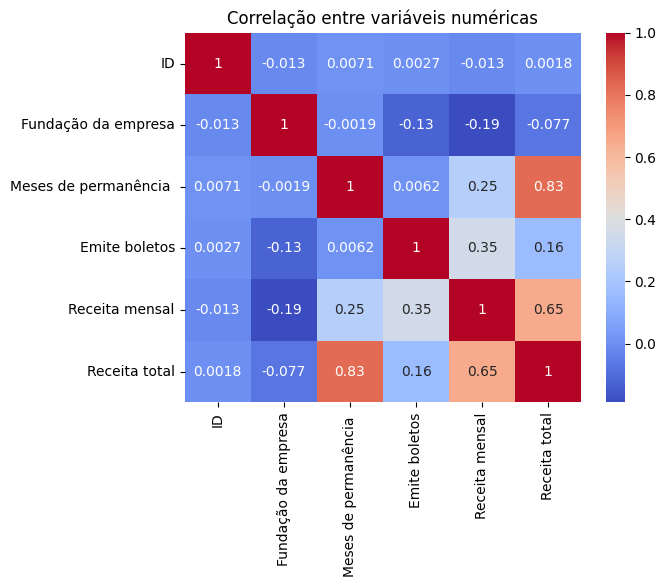

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correla√ß√£o entre vari√°veis num√©ricas")
plt.show()

- Meses de perman√™ncia √ó Receita total: forte correla√ß√£o positiva (0,83) ‚Üí quanto mais tempo o cliente permanece, maior a receita acumulada.

- Receita mensal √ó Receita total: correla√ß√£o alta (0,65) ‚Üí clientes com maior ticket mensal tamb√©m acumulam mais receita.

- Receita mensal √ó Emite boletos: correla√ß√£o moderada (0,35) ‚Üí emiss√£o de boletos tende a estar associada a maiores valores mensais.

- Funda√ß√£o da empresa tem correla√ß√£o fraca ou negativa com as demais vari√°veis ‚Üí pouco impacto direto nas m√©tricas financeiras.

### Analise univariada

In [7]:
display(df["Churn"].value_counts())
display(df["Churn"].value_counts(normalize=True).map("{:.2%}".format))

Churn
N√£o    5174
Sim    1869
Name: count, dtype: int64

Churn
N√£o    73.46%
Sim    26.54%
Name: proportion, dtype: object

C:\Users\User\AppData\Local\Temp\ipykernel_4532\3948055947.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Blues_r")


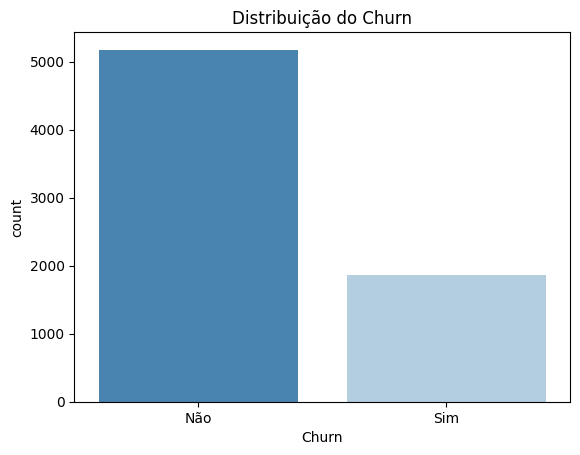

In [8]:
sns.countplot(x="Churn", data=df, palette="Blues_r")
plt.title("Distribui√ß√£o do Churn")
plt.show()

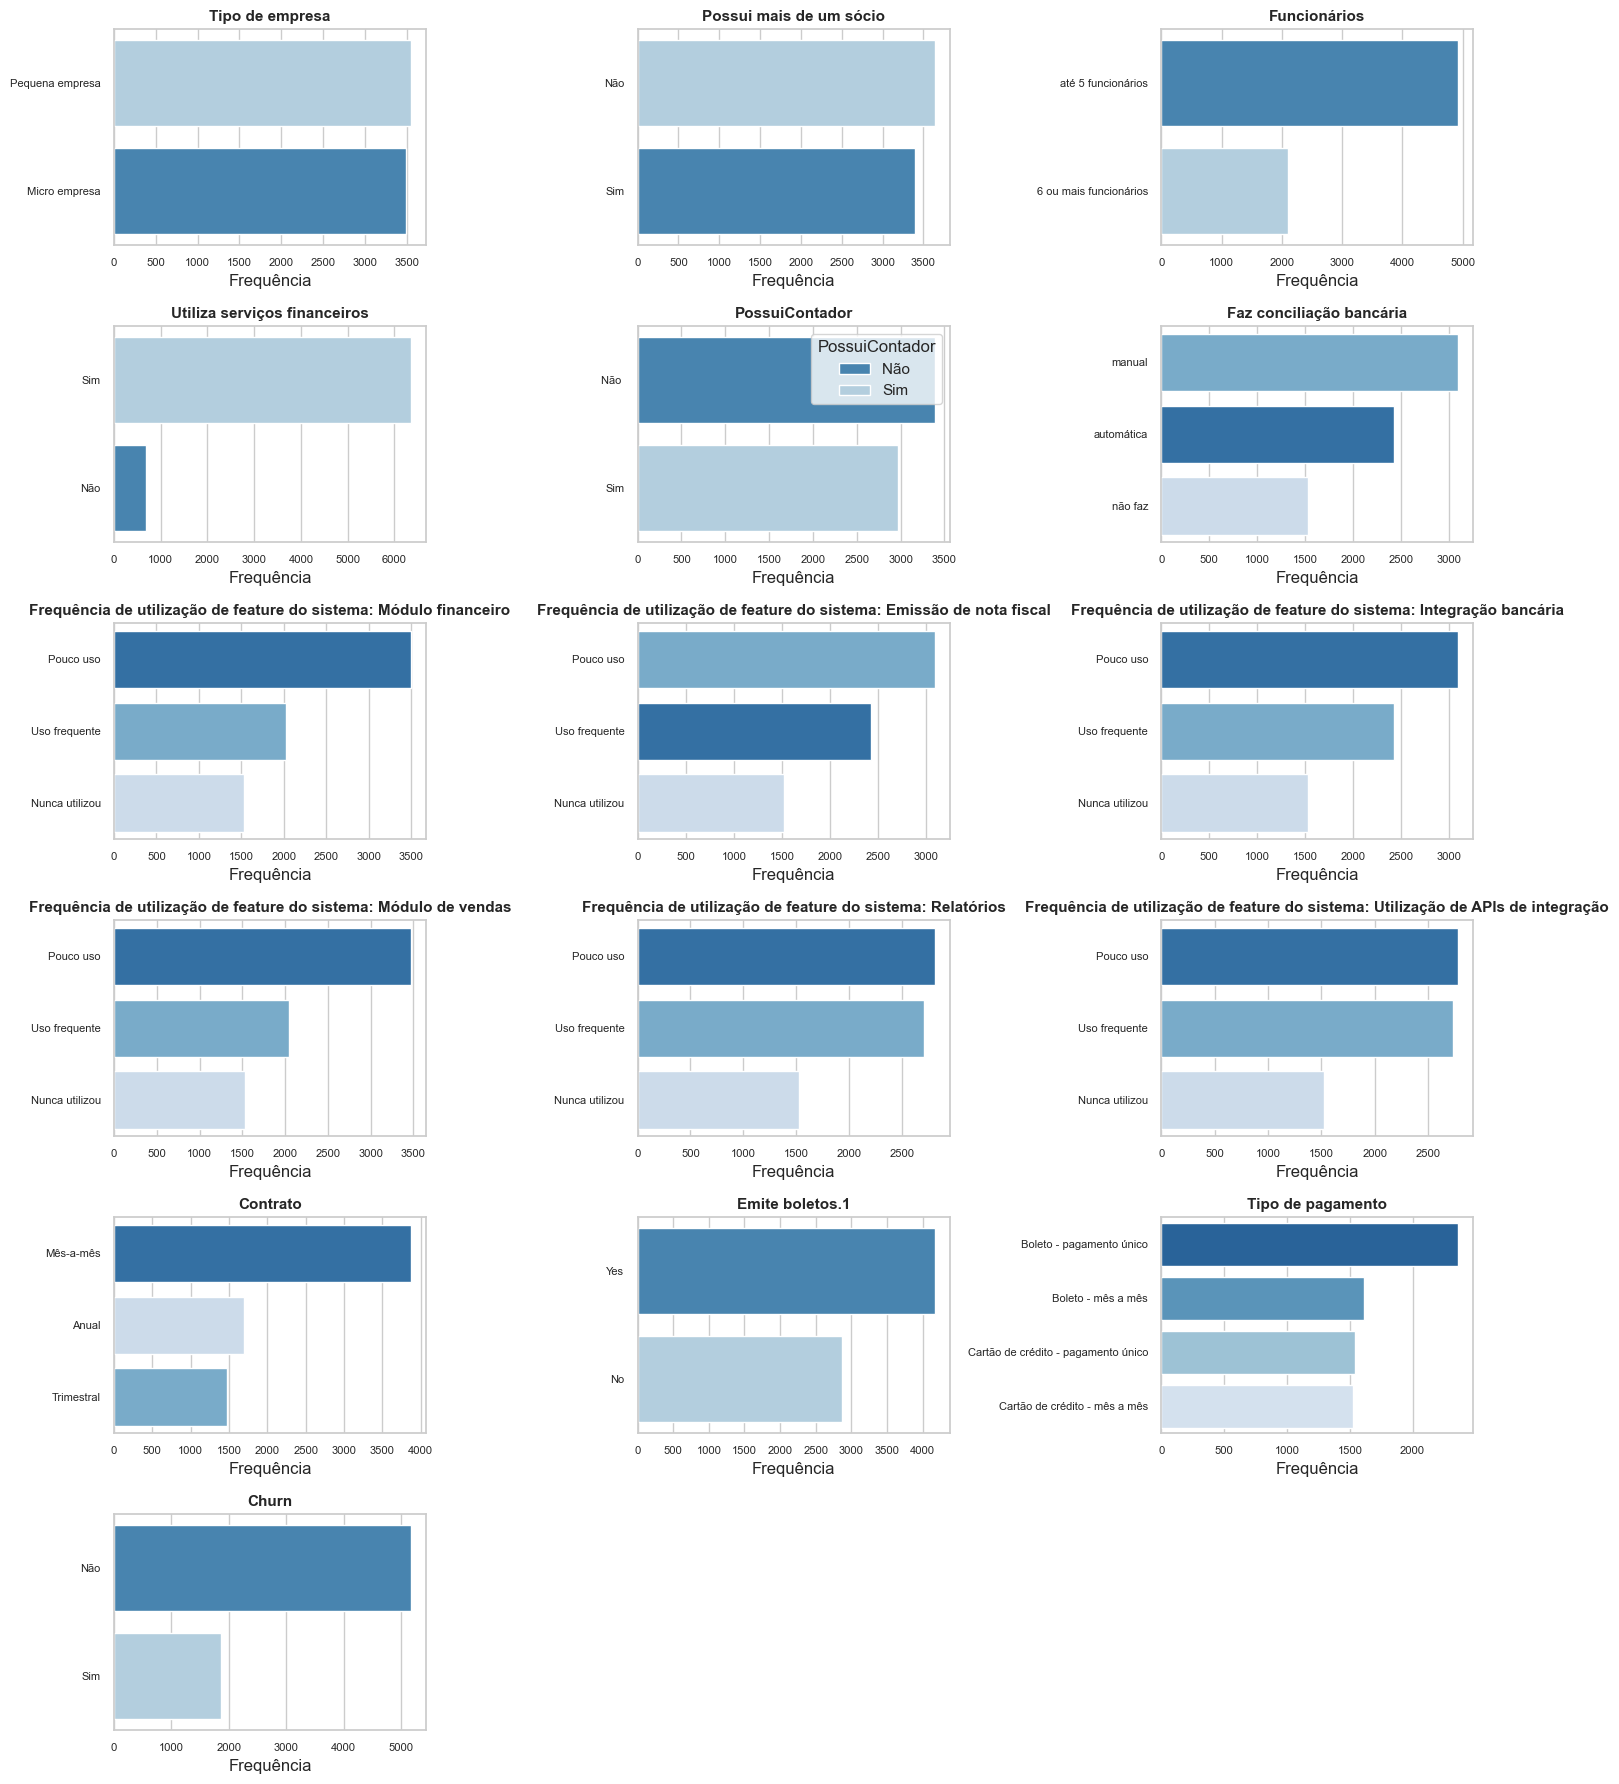

In [9]:
sns.set_theme(style="whitegrid") 
sns.set_palette("Blues_r")        
cat_cols = df.select_dtypes(include=["object"]).columns

n = len(cat_cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3*nrows))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(
        y=col, 
        data=df, 
        order=df[col].value_counts().index, 
        hue=col,
        ax=axes[i],
        palette="Blues_r"
    )
    axes[i].set_title(f"{col}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("Frequ√™ncia")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis="y", labelsize=8)
    axes[i].tick_params(axis="x", labelsize=8)
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

- Tipo de empresa: A maioria √© microempresa.

- Possui mais de um s√≥cio: Predom√≠nio de empresas com mais de um s√≥cio.

- Funcion√°rios: Maioria tem at√© 5 funcion√°rios.

- Utiliza servi√ßos financeiros: Grande parte utiliza servi√ßos financeiros.

- Possui contador: Ter contador √© maioria entre as empresas.

- Faz concilia√ß√£o banc√°ria: Predom√≠nio de processos autom√°ticos, seguidos de manuais.

- M√≥dulo financeiro: Uso frequente √© maioria, mas h√° grupo consider√°vel que nunca utilizou.

- Emiss√£o de nota fiscal: Uso frequente √© predominante.

- Integra√ß√£o banc√°ria: Frequente, mas com n√∫mero expressivo de n√£o usu√°rios.

- M√≥dulo de vendas: Menor ades√£o comparado a outros m√≥dulos; muitos nunca utilizaram.

- Relat√≥rios: Bastante utilizado, mas com parte relevante de pouco uso.

- APIs de integra√ß√£o: Uso frequente, mas ainda h√° muitos que nunca utilizaram.

- Contrato: Modelo mensal √© predominante.

- Emite boletos: A maioria emite boletos.

- Tipo de pagamento: Boleto mensal lidera, seguido de cart√£o de cr√©dito mensal.

- Churn: Maioria n√£o cancelou, mas h√° uma taxa relevante de churn.

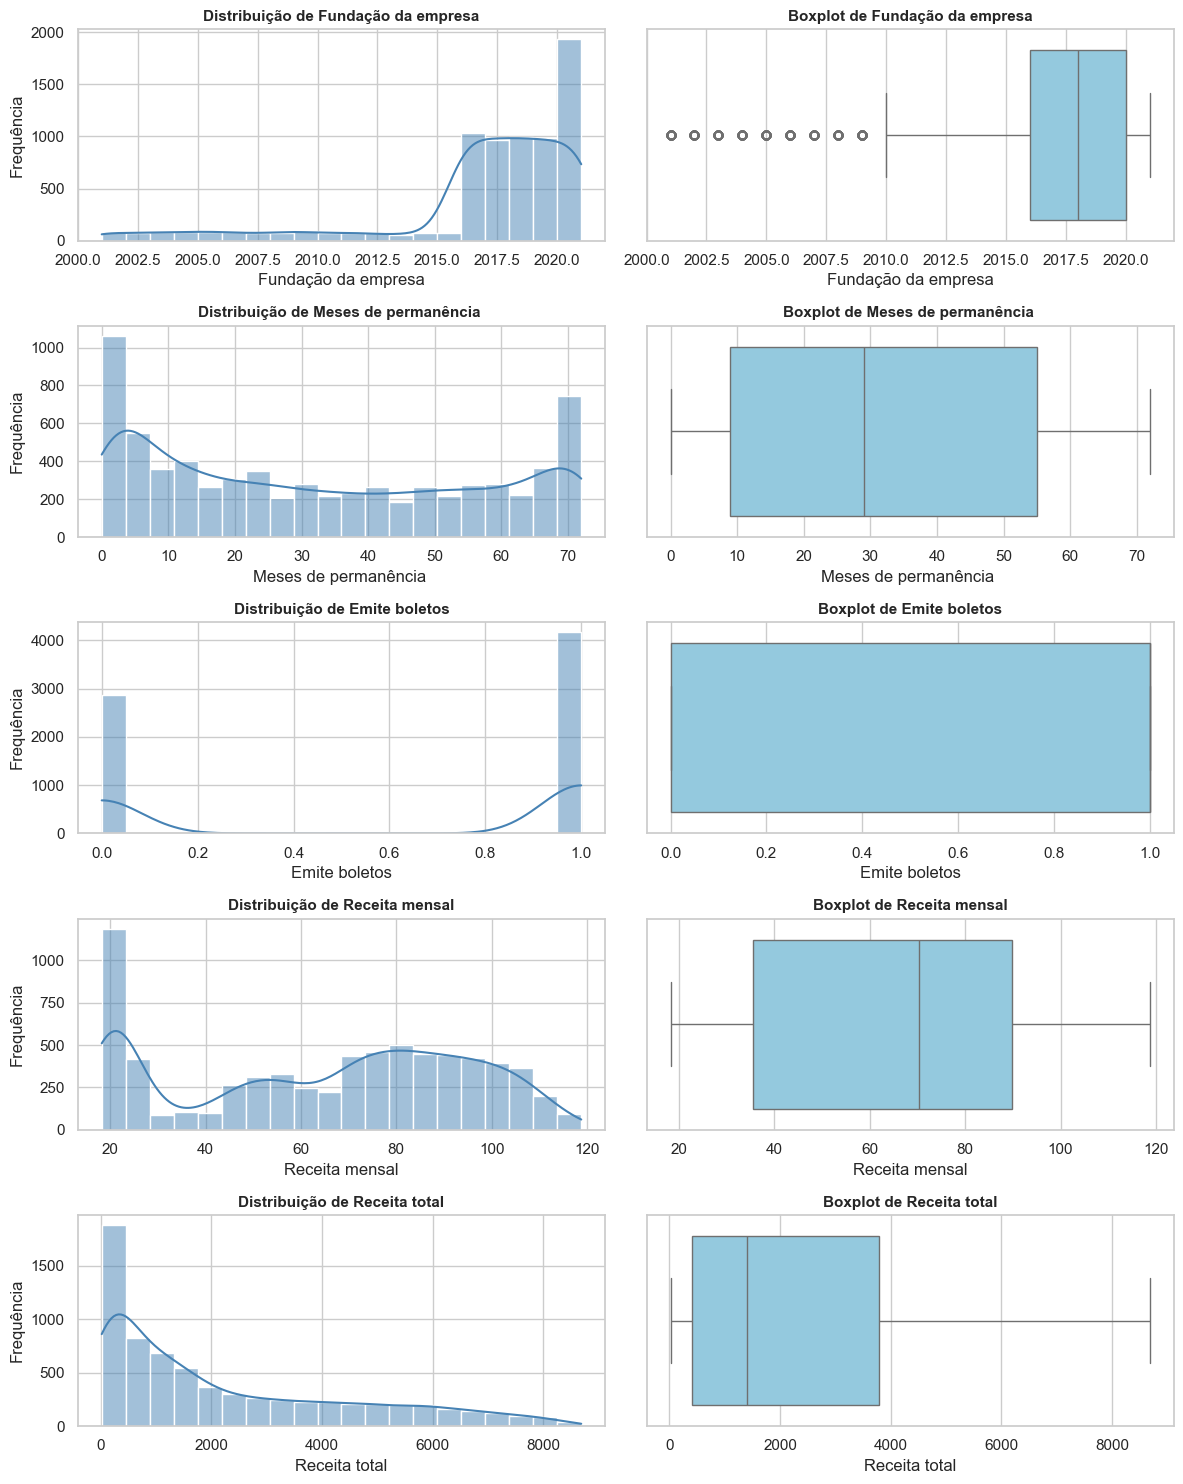

In [10]:
sns.set_theme(style="whitegrid")
sns.set_palette("Blues_r")
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c.lower() not in ["id"]] 

n = len(num_cols)
ncols = 2 
nrows = n

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3*nrows))

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=20, ax=axes[i,0], color="steelblue")
    axes[i,0].set_title(f"Distribui√ß√£o de {col}", fontsize=11, fontweight="bold")
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel("Frequ√™ncia")
    
    sns.boxplot(x=df[col], ax=axes[i,1], color="skyblue")
    axes[i,1].set_title(f"Boxplot de {col}", fontsize=11, fontweight="bold")
    axes[i,1].set_xlabel(col)
    axes[i,1].set_ylabel("")

plt.tight_layout()
plt.show()

- Funda√ß√£o da empresa: Maioria fundada ap√≥s 2015; concentra√ß√£o forte em anos recentes.

- Meses de perman√™ncia: Distribui√ß√£o bimodal ‚Äî muitos clientes no in√≠cio e no m√°ximo de perman√™ncia (‚âà70 meses).

- Emite boletos: Empresas se dividem entre dois polos claros ‚Äî maioria n√£o emite ou emite sempre.

- Receita mensal: Predomin√¢ncia entre 20 e 120; mediana pr√≥xima de 60.

- Receita total: Distribui√ß√£o assim√©trica √† direita, com muitas empresas de baixa receita e poucos outliers de alta receita.

### An√°lise Bivariada

##### Churn √ó Tipo de empresa (categ√≥rica)

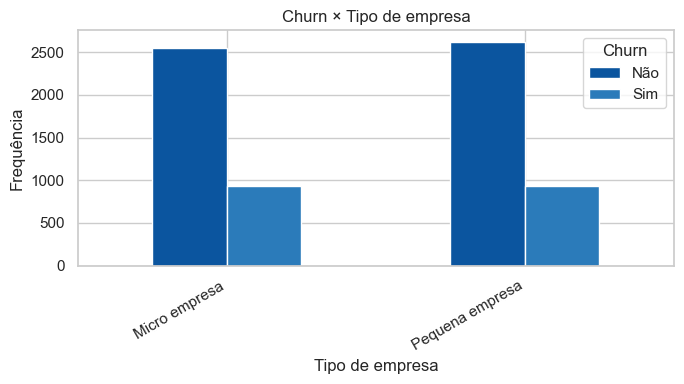

In [11]:
tmp = (df.dropna(subset=["Tipo de empresa","Churn"])
         .groupby(["Tipo de empresa","Churn"]).size()
         .unstack(fill_value=0))

ax = tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Tipo de empresa"); plt.xlabel("Tipo de empresa"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=30, ha="right"); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [12]:
cont = pd.crosstab(df["Tipo de empresa"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Tipo de empresa √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Tipo de empresa √ó Churn
p-valor = 4.865787e-01
‚Üí Sem associa√ß√£o significativa


- O tipo de empresa (Micro vs Pequena) n√£o apresenta associa√ß√£o estatisticamente significativa com o churn (p = 0,49). 
Ou seja, a taxa de cancelamento √© semelhante entre os dois grupos

##### Churn √ó Funda√ß√£o da empresa (num√©rica/ano)

C:\Users\User\AppData\Local\Temp\ipykernel_4532\2680596347.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


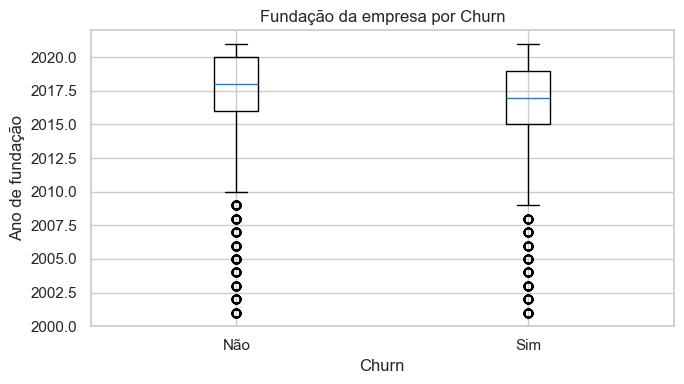

In [13]:
tmp = df.dropna(subset=["Funda√ß√£o da empresa","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Funda√ß√£o da empresa"] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels, showfliers=True)
plt.title("Funda√ß√£o da empresa por Churn"); plt.xlabel("Churn"); plt.ylabel("Ano de funda√ß√£o")
plt.tight_layout(); plt.show()

In [14]:
g1 = df.loc[df["Churn"]=="Sim", "Funda√ß√£o da empresa"].dropna()
g2 = df.loc[df["Churn"]=="N√£o", "Funda√ß√£o da empresa"].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Funda√ß√£o da empresa √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Diferen√ßa significativa" if p < 0.05 else "‚Üí Sem diferen√ßa significativa")

Mann-Whitney - Funda√ß√£o da empresa √ó Churn
p-valor = 1.932065e-18
‚Üí Diferen√ßa significativa


- O ano de funda√ß√£o das empresas difere significativamente entre clientes que cancelaram e os que permaneceram (p < 0,001). 

- Empresas mais recentes apresentam maior propens√£o ao churn.

##### Churn √ó Possui mais de um s√≥cio (categ√≥rica)

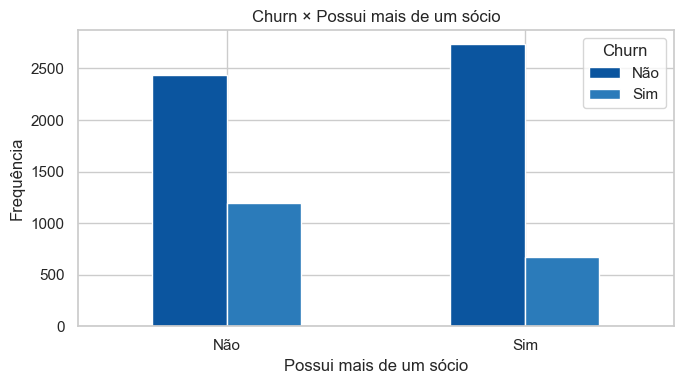

In [15]:
tmp = (df.dropna(subset=["Possui mais de um s√≥cio","Churn"])
         .groupby(["Possui mais de um s√≥cio","Churn"]).size()
         .unstack(fill_value=0))

ax = tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Possui mais de um s√≥cio"); plt.xlabel("Possui mais de um s√≥cio"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [16]:
cont = pd.crosstab(df["Possui mais de um s√≥cio"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - S√≥cio √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - S√≥cio √ó Churn
p-valor = 2.139911e-36
‚Üí Associa√ß√£o significativa


- H√° associa√ß√£o significativa entre ter mais de um s√≥cio e o churn (p < 0,001). 
- Empresas com m√∫ltiplos s√≥cios apresentam menor propens√£o ao cancelamento.

##### Churn √ó Funcion√°rios (categ√≥rica ordinal)

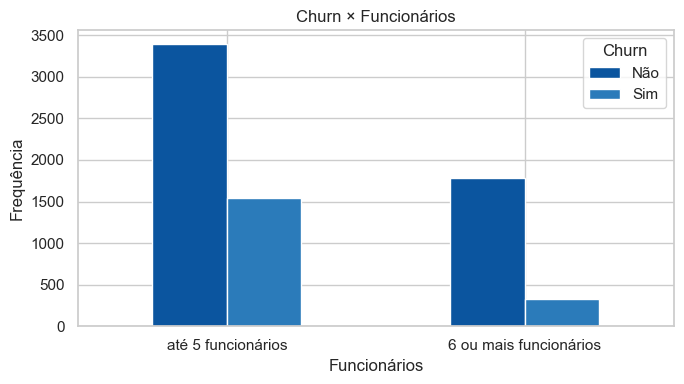

In [17]:
order = ["at√© 5 funcion√°rios","6 ou mais funcion√°rios"] if "6 ou mais funcion√°rios" in df["Funcion√°rios"].unique() else None
tmp = (df.dropna(subset=["Funcion√°rios","Churn"])
         .groupby(["Funcion√°rios","Churn"]).size()
         .unstack(fill_value=0).reindex(order) if order else
       (df.dropna(subset=["Funcion√°rios","Churn"])
         .groupby(["Funcion√°rios","Churn"]).size()
         .unstack(fill_value=0)))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Funcion√°rios"); plt.xlabel("Funcion√°rios"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [18]:
cont = pd.crosstab(df["Funcion√°rios"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Funcion√°rios √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Funcion√°rios √ó Churn
p-valor = 4.924922e-43
‚Üí Associa√ß√£o significativa


- Existe associa√ß√£o significativa entre o n√∫mero de funcion√°rios e o churn (p < 0,001). 
- Empresas com mais de 5 funcion√°rios t√™m menor probabilidade de cancelamento

##### Churn √ó Meses de perman√™ncia (num√©rica)

C:\Users\User\AppData\Local\Temp\ipykernel_4532\2598162196.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


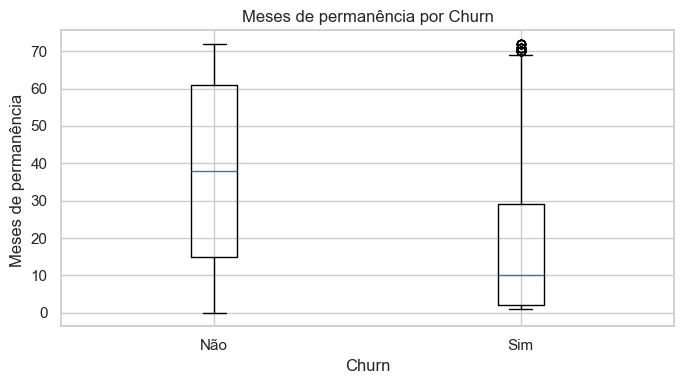

In [19]:
tmp = df.dropna(subset=["Meses de perman√™ncia ","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Meses de perman√™ncia "] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels)
plt.title("Meses de perman√™ncia por Churn"); plt.xlabel("Churn"); plt.ylabel("Meses de perman√™ncia ")
plt.tight_layout(); plt.show()

In [20]:
g1 = df.loc[df["Churn"]=="Sim", "Meses de perman√™ncia "].dropna()
g2 = df.loc[df["Churn"]=="N√£o", "Meses de perman√™ncia "].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Meses de perman√™ncia √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Diferen√ßa significativa" if p < 0.05 else "‚Üí Sem diferen√ßa significativa")

Mann-Whitney - Meses de perman√™ncia √ó Churn
p-valor = 2.419636e-208
‚Üí Diferen√ßa significativa


- O tempo de perman√™ncia difere significativamente entre os grupos (p < 0,001). 
- Clientes que cancelaram ficaram menos tempo na base em compara√ß√£o aos que permaneceram.

##### Churn √ó Utiliza servi√ßos financeiros (categ√≥rica)

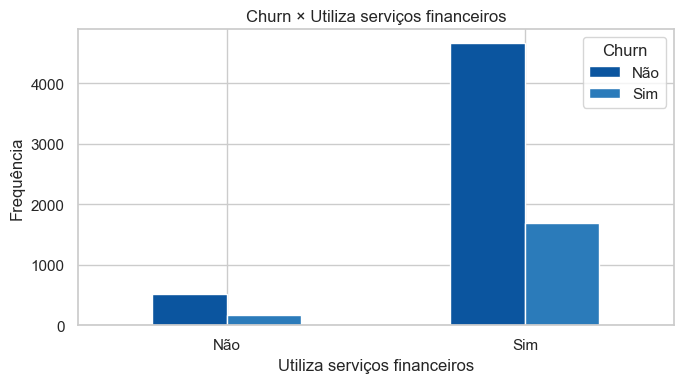

In [21]:
tmp = (df.dropna(subset=["Utiliza servi√ßos financeiros","Churn"])
         .groupby(["Utiliza servi√ßos financeiros","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Utiliza servi√ßos financeiros"); plt.xlabel("Utiliza servi√ßos financeiros"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [22]:
cont = pd.crosstab(df["Utiliza servi√ßos financeiros"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Servi√ßos financeiros √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Servi√ßos financeiros √ó Churn
p-valor = 3.387825e-01
‚Üí Sem associa√ß√£o significativa


- O uso de servi√ßos financeiros n√£o apresenta associa√ß√£o significativa com o churn (p = 0,34). 

- Ou seja, esse fator n√£o influencia na reten√ß√£o.

##### Churn √ó PossuiContador (categ√≥rica; trata NaN como ‚ÄúN√£o informado‚Äù)

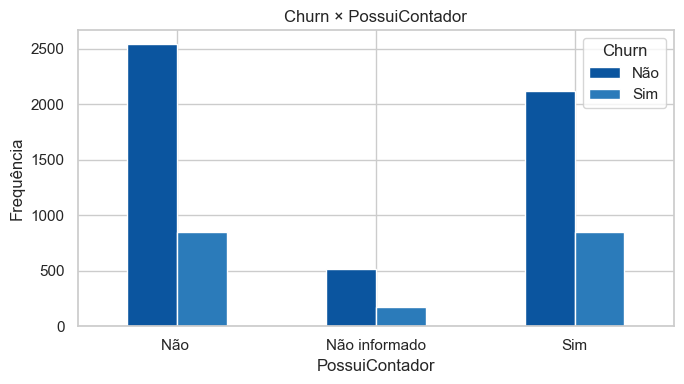

In [23]:
tmp = df.copy()
tmp["PossuiContador"] = tmp["PossuiContador"].fillna("N√£o informado")
tab = (tmp.groupby(["PossuiContador","Churn"]).size().unstack(fill_value=0))

tab.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó PossuiContador"); plt.xlabel("PossuiContador"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [24]:
cont = pd.crosstab(df["PossuiContador"].fillna("N√£o informado"), df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Possui Contador √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Possui Contador √ó Churn
p-valor = 3.464383e-03
‚Üí Associa√ß√£o significativa


- Possuir contador apresenta associa√ß√£o significativa com o churn (p < 0,01). 
- Empresas sem contador t√™m maior propens√£o ao cancelamento.

##### Churn √ó Faz concilia√ß√£o banc√°ria (categ√≥rica: manual/autom√°tica/n√£o faz)

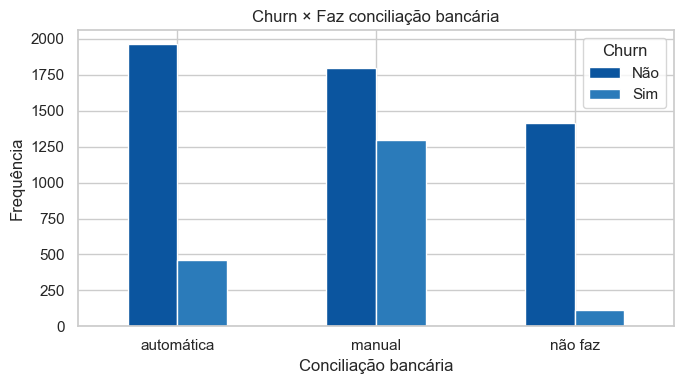

In [25]:
tmp = (df.dropna(subset=["Faz concilia√ß√£o banc√°ria","Churn"])
         .groupby(["Faz concilia√ß√£o banc√°ria","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Faz concilia√ß√£o banc√°ria"); plt.xlabel("Concilia√ß√£o banc√°ria"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [26]:
cont = pd.crosstab(df["Faz concilia√ß√£o banc√°ria"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Concilia√ß√£o banc√°ria √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Concilia√ß√£o banc√°ria √ó Churn
p-valor = 9.571788e-160
‚Üí Associa√ß√£o significativa


- H√° associa√ß√£o significativa entre concilia√ß√£o banc√°ria e churn (p < 0,001). 
- Empresas que realizam concilia√ß√£o manual apresentam maior propens√£o ao cancelamento, enquanto as que usam concilia√ß√£o autom√°tica t√™m maior reten√ß√£o.

##### Churn √ó M√≥dulo financeiro (freq. de uso) (categ√≥rica ordinal)

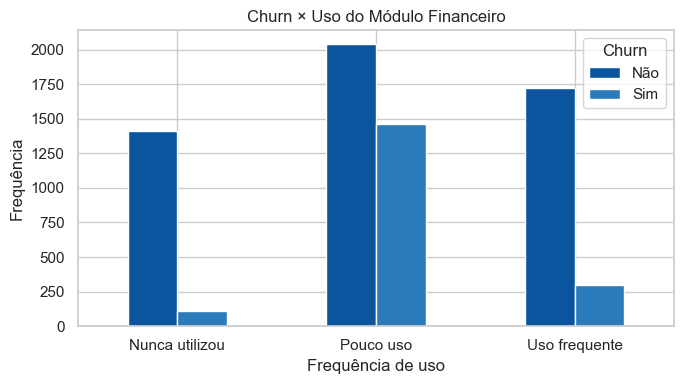

In [27]:
order = ["Nunca utilizou","Pouco uso","Uso frequente"]
tmp = (df.dropna(subset=["Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo financeiro","Churn"])
         .groupby(["Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo financeiro","Churn"]).size()
         .unstack(fill_value=0))
tmp = tmp.reindex(order)
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Uso do M√≥dulo Financeiro"); plt.xlabel("Frequ√™ncia de uso"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [28]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo financeiro"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - M√≥dulo Financeiro √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - M√≥dulo Financeiro √ó Churn
p-valor = 2.661150e-185
‚Üí Associa√ß√£o significativa


- H√° associa√ß√£o significativa entre o uso do m√≥dulo financeiro e o churn (p < 0,001). 
- Clientes com uso frequente apresentam menor propens√£o ao cancelamento, enquanto o pouco uso est√° fortemente ligado ao churn.

##### Churn √ó Emiss√£o de nota fiscal (freq. de uso)

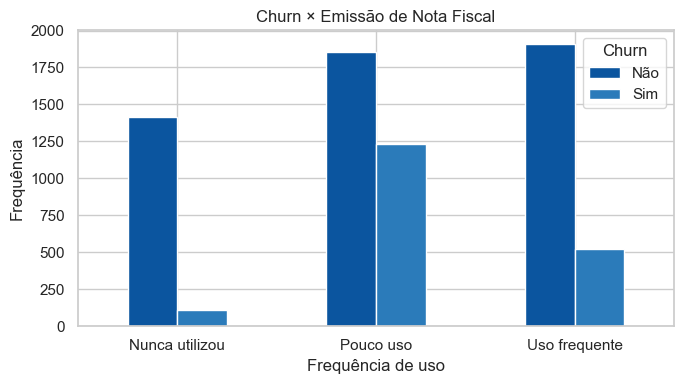

In [29]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Emiss√£o de nota fiscal"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Emiss√£o de Nota Fiscal"); plt.xlabel("Frequ√™ncia de uso"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [30]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Emiss√£o de nota fiscal"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Emiss√£o de nota fiscal √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Emiss√£o de nota fiscal √ó Churn
p-valor = 2.079759e-131
‚Üí Associa√ß√£o significativa


- Existe associa√ß√£o significativa entre a emiss√£o de nota fiscal e o churn (p < 0,001). 
- O uso frequente est√° ligado a maior reten√ß√£o, enquanto o pouco uso aumenta a chance de cancelamento.

##### Churn √ó Integra√ß√£o banc√°ria (freq. de uso)

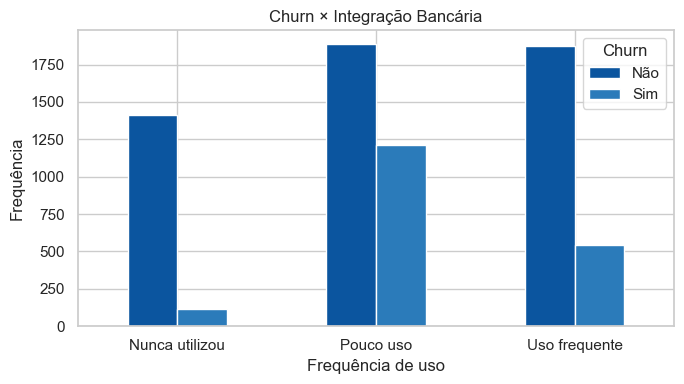

In [31]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Integra√ß√£o banc√°ria"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Integra√ß√£o Banc√°ria"); plt.xlabel("Frequ√™ncia de uso"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [32]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Integra√ß√£o banc√°ria"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Integra√ß√£o banc√°ria √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Integra√ß√£o banc√°ria √ó Churn
p-valor = 5.505219e-122
‚Üí Associa√ß√£o significativa


- H√° associa√ß√£o significativa entre integra√ß√£o banc√°ria e churn (p < 0,001). 
- Clientes que fazem uso frequente t√™m maior reten√ß√£o, enquanto o pouco uso est√° mais relacionado ao cancelamento.

##### Churn √ó M√≥dulo de vendas (freq. de uso)

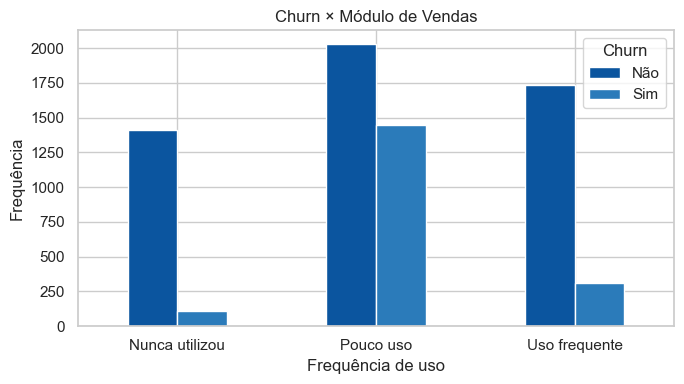

In [33]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo de vendas"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó M√≥dulo de Vendas"); plt.xlabel("Frequ√™ncia de uso"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [34]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: M√≥dulo de vendas"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - M√≥dulo de vendas √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - M√≥dulo de vendas √ó Churn
p-valor = 1.443084e-180
‚Üí Associa√ß√£o significativa


- Existe associa√ß√£o significativa entre o uso do m√≥dulo de vendas e o churn (p < 0,001). 
- O uso frequente est√° ligado √† reten√ß√£o, enquanto o pouco uso aumenta a chance de cancelamento.

##### Churn √ó Relat√≥rios (freq. de uso)

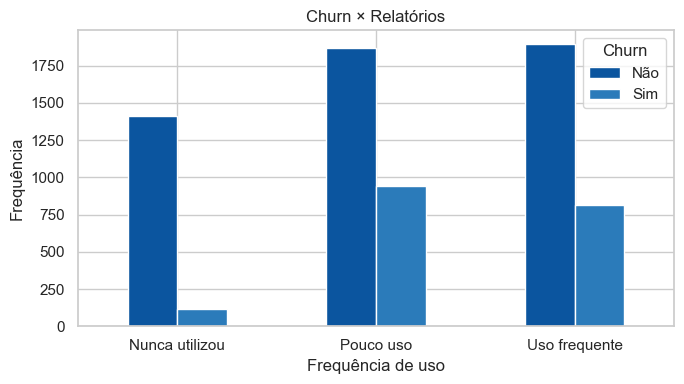

In [35]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Relat√≥rios"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Relat√≥rios"); plt.xlabel("Frequ√™ncia de uso"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [36]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Relat√≥rios"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Relat√≥rios √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Relat√≥rios √ó Churn
p-valor = 5.528994e-82
‚Üí Associa√ß√£o significativa


- H√° associa√ß√£o significativa entre o uso de relat√≥rios e o churn (p < 0,001). 
- O uso frequente est√° relacionado √† maior reten√ß√£o, enquanto o pouco uso aumenta a probabilidade de cancelamento.

##### Churn √ó APIs de integra√ß√£o (freq. de uso)

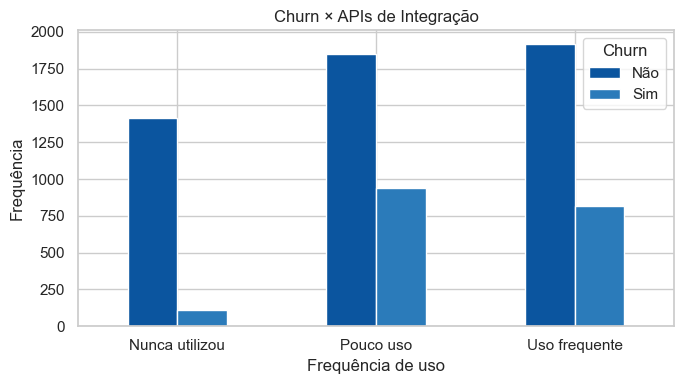

In [37]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Utiliza√ß√£o de APIs de integra√ß√£o"
tmp = (df.dropna(subset=[col,"Churn"]).groupby([col,"Churn"]).size().unstack(fill_value=0))
tmp = tmp.reindex(["Nunca utilizou","Pouco uso","Uso frequente"])
tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó APIs de Integra√ß√£o"); plt.xlabel("Frequ√™ncia de uso"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [38]:
col = "Frequ√™ncia de utiliza√ß√£o de feature do sistema: Utiliza√ß√£o de APIs de integra√ß√£o"
cont = pd.crosstab(df[col], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - APIs de integra√ß√£o √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - APIs de integra√ß√£o √ó Churn
p-valor = 2.667757e-82
‚Üí Associa√ß√£o significativa


- Existe associa√ß√£o significativa entre o uso de APIs de integra√ß√£o e o churn (p < 0,001). 
- O uso frequente est√° ligado √† reten√ß√£o, enquanto o pouco uso aumenta a chance de cancelamento.

##### Churn √ó Contrato (categ√≥rica)

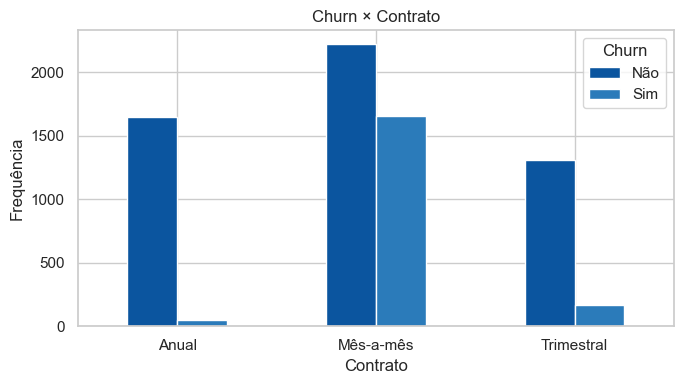

In [39]:
tmp = (df.dropna(subset=["Contrato","Churn"])
         .groupby(["Contrato","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Contrato"); plt.xlabel("Contrato"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [40]:
cont = pd.crosstab(df["Contrato"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Contrato √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Contrato √ó Churn
p-valor = 5.863038e-258
‚Üí Associa√ß√£o significativa


- H√° associa√ß√£o significativa entre o tipo de contrato e o churn (p < 0,001). 
- Contratos anuais e trimestrais est√£o ligados a maior reten√ß√£o, enquanto o m√™s a m√™s apresenta maior risco de cancelamento.

##### Churn √ó Emite boletos (bin√°ria 0/1)

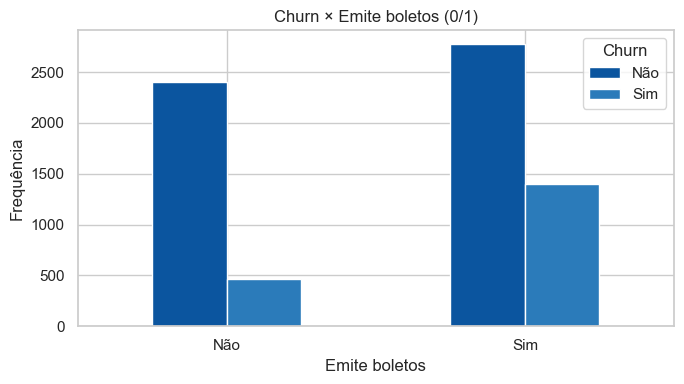

In [41]:
tmp = (df.dropna(subset=["Emite boletos","Churn"])
         .assign(**{"Emite boletos": df["Emite boletos"].map({0:"N√£o",1:"Sim"})})
         .groupby(["Emite boletos","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Emite boletos (0/1)"); plt.xlabel("Emite boletos"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [42]:
tmp = df["Emite boletos"].map({0:"N√£o",1:"Sim"}).fillna("N√£o informado")
cont = pd.crosstab(tmp, df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Emite boletos √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Emite boletos √ó Churn
p-valor = 4.073355e-58
‚Üí Associa√ß√£o significativa


- Existe associa√ß√£o significativa entre emitir boletos e o churn (p < 0,001). 
- Empresas que emitem boletos apresentam maior propens√£o ao cancelamento.

##### Churn √ó Emite boletos.1 (Yes/No)

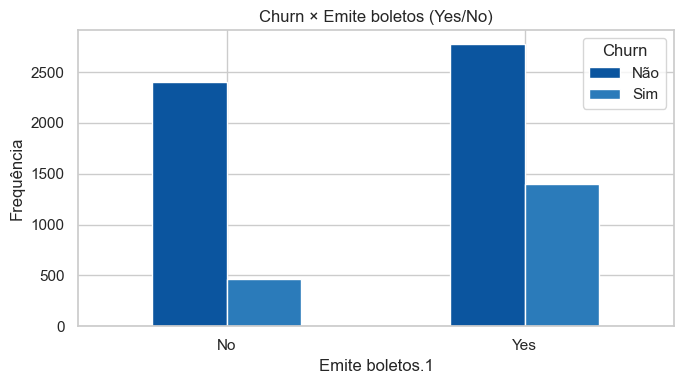

In [43]:
tmp = (df.dropna(subset=["Emite boletos.1","Churn"])
         .groupby(["Emite boletos.1","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(7,4))
plt.title("Churn √ó Emite boletos (Yes/No)"); plt.xlabel("Emite boletos.1"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=0); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [44]:
cont = pd.crosstab(df["Emite boletos.1"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Emite boletos.1 √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Emite boletos.1 √ó Churn
p-valor = 4.073355e-58
‚Üí Associa√ß√£o significativa


- Confirmando a vari√°vel duplicada, h√° associa√ß√£o significativa entre emitir boletos e o churn (p < 0,001). 
- Empresas que emitem boletos apresentam maior risco de cancelamento.

##### Churn √ó Tipo de pagamento (categ√≥rica)

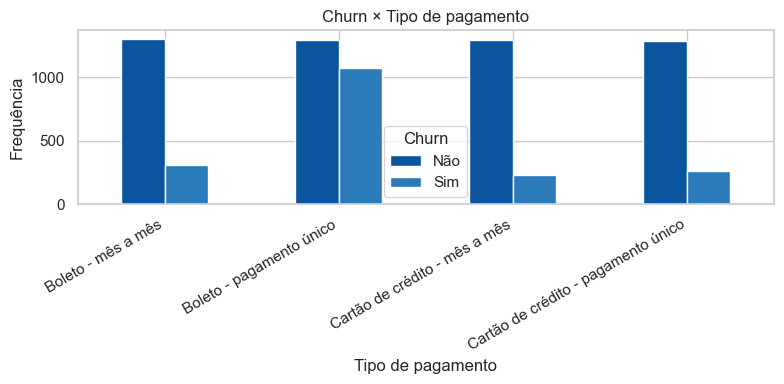

In [45]:
tmp = (df.dropna(subset=["Tipo de pagamento","Churn"])
         .groupby(["Tipo de pagamento","Churn"]).size()
         .unstack(fill_value=0))

tmp.plot(kind="bar", figsize=(8,4))
plt.title("Churn √ó Tipo de pagamento"); plt.xlabel("Tipo de pagamento"); plt.ylabel("Frequ√™ncia")
plt.xticks(rotation=30, ha="right"); plt.legend(title="Churn"); plt.tight_layout(); plt.show()

In [46]:
cont = pd.crosstab(df["Tipo de pagamento"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cont)

print("Qui-quadrado - Tipo de pagamento √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Associa√ß√£o significativa" if p < 0.05 else "‚Üí Sem associa√ß√£o significativa")

Qui-quadrado - Tipo de pagamento √ó Churn
p-valor = 3.682355e-140
‚Üí Associa√ß√£o significativa


- H√° associa√ß√£o significativa entre o tipo de pagamento e o churn (p < 0,001). 
- O boleto m√™s a m√™s concentra maior risco de cancelamento, enquanto pagamento √∫nico ou cart√£o de cr√©dito est√£o ligados a maior reten√ß√£o.

##### Churn √ó Receita mensal (num√©rica)

C:\Users\User\AppData\Local\Temp\ipykernel_4532\3726543701.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


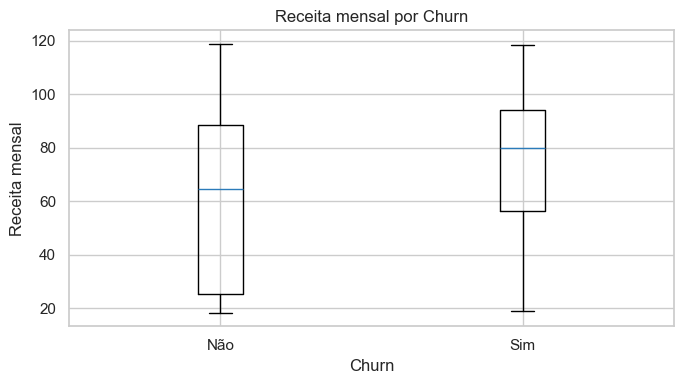

In [47]:
tmp = df.dropna(subset=["Receita mensal","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Receita mensal"] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels)
plt.title("Receita mensal por Churn"); plt.xlabel("Churn"); plt.ylabel("Receita mensal")
plt.tight_layout(); plt.show()

In [48]:
g1 = df.loc[df["Churn"]=="Sim", "Receita mensal"].dropna()
g2 = df.loc[df["Churn"]=="N√£o", "Receita mensal"].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Receita mensal √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Diferen√ßa significativa" if p < 0.05 else "‚Üí Sem diferen√ßa significativa")

Mann-Whitney - Receita mensal √ó Churn
p-valor = 3.311628e-54
‚Üí Diferen√ßa significativa


- A receita mensal difere significativamente entre os grupos (p < 0,001). 
- Clientes que cancelaram tendem a ter maior ticket m√©dio mensal do que os que permaneceram.

##### Churn √ó Receita total (num√©rica)

C:\Users\User\AppData\Local\Temp\ipykernel_4532\2666085569.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


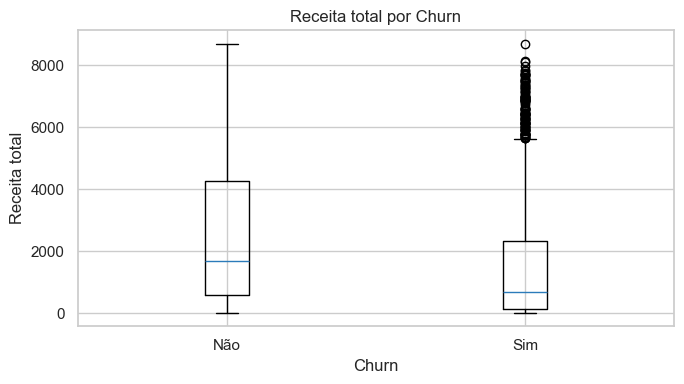

In [49]:
tmp = df.dropna(subset=["Receita total","Churn"])
labels = tmp["Churn"].unique()
data = [tmp.loc[tmp["Churn"]==c, "Receita total"] for c in labels]

plt.figure(figsize=(7,4))
plt.boxplot(data, labels=labels)
plt.title("Receita total por Churn"); plt.xlabel("Churn"); plt.ylabel("Receita total")
plt.tight_layout(); plt.show()

In [50]:
g1 = df.loc[df["Churn"]=="Sim", "Receita total"].dropna()
g2 = df.loc[df["Churn"]=="N√£o", "Receita total"].dropna()

stat, p = mannwhitneyu(g1, g2, alternative="two-sided")

print("Mann-Whitney - Receita total √ó Churn")
print(f"p-valor = {p:.6e}")
print("‚Üí Diferen√ßa significativa" if p < 0.05 else "‚Üí Sem diferen√ßa significativa")

Mann-Whitney - Receita total √ó Churn
p-valor = 1.995985e-84
‚Üí Diferen√ßa significativa


- A receita total difere significativamente entre os grupos (p < 0,001). 
- Clientes que permanecem geram receita acumulada muito maior do que os que cancelam.

meses_col: Meses de perman√™ncia  | churn_col: Churn
n_sim: 1869 n_nao: 5174 | nunique_sim: 72 nunique_nao: 73


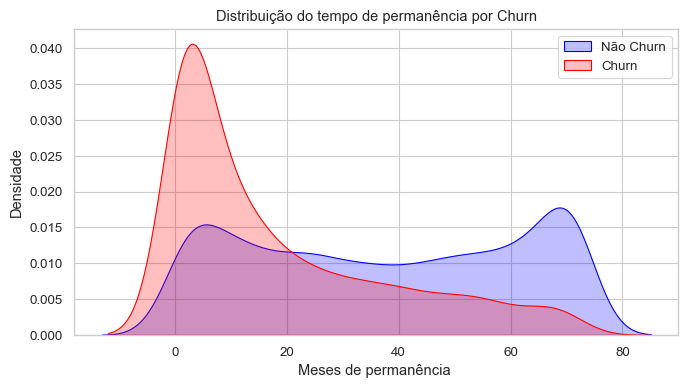

In [51]:
def _norm(s):
    s = ''.join(ch for ch in unicodedata.normalize('NFKD', str(s)) if not unicodedata.combining(ch))
    return re.sub(r'\s+', ' ', s).strip().lower()

# 1) Detectar colunas
meses_col = next((c for c in df.columns if ('meses' in _norm(c) and 'perman' in _norm(c))), None)
churn_col = next((c for c in df.columns if 'churn' in _norm(c)), None)
print("meses_col:", meses_col, "| churn_col:", churn_col)

# 2) M√°scaras robustas para Churn (aceita Sim/N√£o/Yes/No/0/1/True/False)
churn_norm = df[churn_col].astype(str).str.strip().str.lower()
mask_sim = churn_norm.isin(['sim','s','yes','y','1','true'])
mask_nao = churn_norm.isin(['n√£o','nao','n','no','0','false'])

# 3) S√©rie num√©rica
meses_num = pd.to_numeric(df[meses_col], errors='coerce')

s_sim = meses_num[mask_sim].dropna()
s_nao = meses_num[mask_nao].dropna()

print("n_sim:", len(s_sim), "n_nao:", len(s_nao),
      "| nunique_sim:", s_sim.nunique(), "nunique_nao:", s_nao.nunique())

# 4) Plot com fallback: se KDE n√£o for adequado, usa histograma
sns.set_context("paper", font_scale=1.1)
plt.figure(figsize=(7,4))

plotted = False
if len(s_nao) >= 2 and s_nao.nunique() >= 2:
    sns.kdeplot(s_nao, fill=True, color="blue", label="N√£o Churn")
    plotted = True
if len(s_sim) >= 2 and s_sim.nunique() >= 2:
    sns.kdeplot(s_sim, fill=True, color="red", label="Churn")
    plotted = True

if not plotted:
    # Fallback: histogramas sobrepostos normalizados
    if len(s_nao) > 0:
        sns.histplot(s_nao, bins=20, stat="density", alpha=0.4, color="blue", label="N√£o Churn")
    if len(s_sim) > 0:
        sns.histplot(s_sim, bins=20, stat="density", alpha=0.4, color="red", label="Churn")

plt.legend(loc="upper right")
plt.ylabel("Densidade")
plt.xlabel(meses_col)
plt.title("Distribui√ß√£o do tempo de perman√™ncia por Churn")
plt.tight_layout()
plt.show()

- Clientes que churnam concentram-se nos primeiros meses de perman√™ncia, enquanto clientes n√£o churn permanecem ativos por muito mais tempo.

#### Separa√ß√£o dos dados

In [52]:
X = df.drop(columns = "Churn")
y = df["Churn"].values

In [53]:
X = df.drop(columns=["ID", "Churn"])
y = df["Churn"].map({"Sim":1, "N√£o":0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Modelo baseline

== Modelo Baseline (Dummy Stratified) ==
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1035
           1       0.29      0.29      0.29       374

    accuracy                           0.62      1409
   macro avg       0.52      0.52      0.52      1409
weighted avg       0.62      0.62      0.62      1409



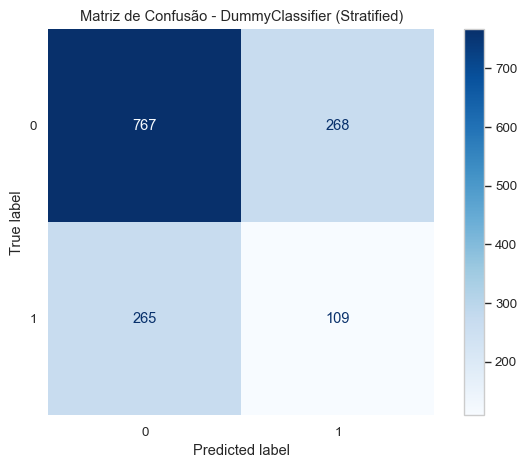

In [54]:
# modelo baseline estratificado
dummy_strat = DummyClassifier(strategy="stratified", random_state=42)
dummy_strat.fit(X_train, y_train)

# previs√µes
y_pred_dummy_strat = dummy_strat.predict(X_test)
y_proba_dummy_strat = dummy_strat.predict_proba(X_test)[:, 1]

# m√©tricas
print("== Modelo Baseline (Dummy Stratified) ==")
print(classification_report(y_test, y_pred_dummy_strat))


# matriz de confus√£o
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dummy_strat, cmap="Blues", colorbar=True
)
plt.title("Matriz de Confus√£o - DummyClassifier (Stratified)")
plt.gca().spines[:].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

- O modelo n√£o aprende padr√µes reais, apenas simula aleatoriedade estratificada ‚Äî por isso a performance √© pr√≥xima ao acaso.

- A acur√°cia (62%) reflete apenas o desbalanceamento da base, n√£o qualidade preditiva.

- A classe minorit√°ria (1) tem baixa precis√£o e recall (0.29), mostrando que o baseline n√£o consegue identificar churn de forma confi√°vel.

ROC AUC: 0.5163


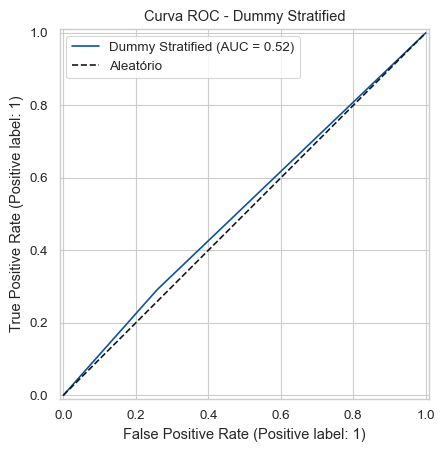

In [55]:
# curva ROC
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_dummy_strat):.4f}")
RocCurveDisplay.from_predictions(y_test, y_proba_dummy_strat, name="Dummy Stratified")
plt.plot([0, 1], [0, 1], "k--", label="Aleat√≥rio")
plt.title("Curva ROC - Dummy Stratified")
plt.legend()
plt.show()

- A curva segue quase a linha aleat√≥ria, confirmando aus√™ncia de aprendizado real.

- O AUC ‚âà 0.52 mostra desempenho praticamente igual ao acaso (0.5).

- O baseline n√£o diferencia efetivamente positivos de negativos, servindo apenas como refer√™ncia m√≠nima.

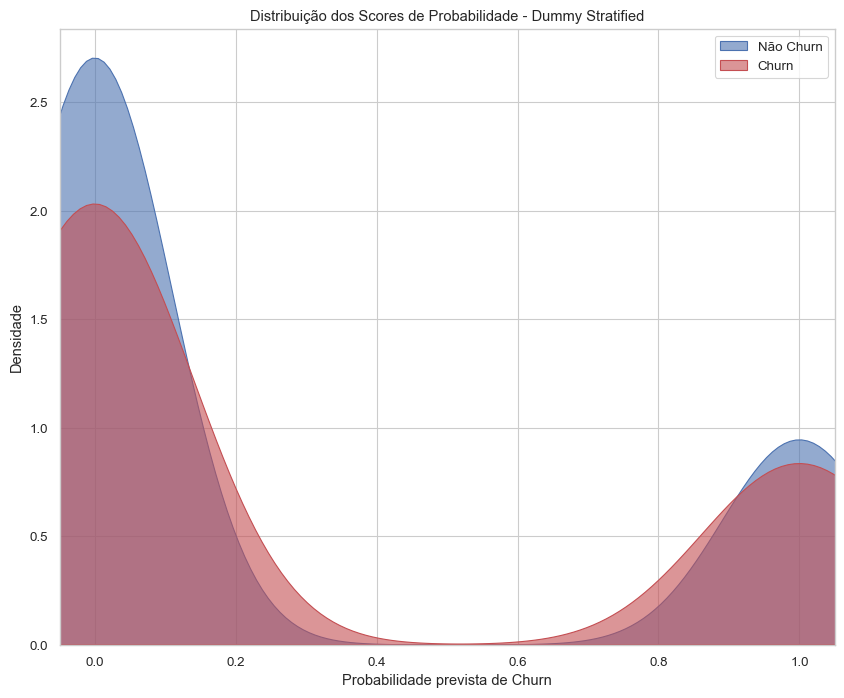

In [56]:
# distribui√ß√£o de probabilidades (KDE)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(y_proba_dummy_strat[y_test == 0], ax=ax, color="b", fill=True, alpha=0.6, label="N√£o Churn")
sns.kdeplot(y_proba_dummy_strat[y_test == 1], ax=ax, color="r", fill=True, alpha=0.6, label="Churn")
plt.title("Distribui√ß√£o dos Scores de Probabilidade - Dummy Stratified")
plt.xlabel("Probabilidade prevista de Churn")
plt.ylabel("Densidade")
plt.xlim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.show()

- As curvas de Churn e N√£o Churn se sobrep√µem fortemente, mostrando que o modelo n√£o separa as classes.

- A distribui√ß√£o concentra probabilidades em torno de 0 e 1 de forma aleat√≥ria, sem padr√£o real. 

- Refor√ßa que o baseline n√£o tem poder discriminativo, servindo apenas como refer√™ncia m√≠nima.

#### Pr√©-processamento

C√≥pia do DataFrame

- df = df.copy() ‚Üí evita modificar o df original por acidente.

Tratamento de coluna duplicada

- Removeu "Emite boletos.1", que era redundante em rela√ß√£o a "Emite boletos".

Tratamento de valores ausentes em Receita Total

- Onde Receita total estava nula, voc√™ preencheu com:

- Receita total = Receita mensal * Meses de perman√™ncia, Isso cria consist√™ncia, j√° que faz sentido como proxy para receita acumulada.

Separa√ß√£o de vari√°veis num√©ricas e categ√≥ricas

- num_cols = todas as colunas num√©ricas.

- cat_cols = todas as colunas categ√≥ricas.

Defini√ß√£o do pr√©-processamento via ColumnTransformer:

- Num√©ricas:

- SimpleImputer(strategy="median") ‚Üí preenche nulos com a mediana.

- StandardScaler() ‚Üí padroniza (m√©dia = 0, desvio = 1).

- Categ√≥ricas:

- SimpleImputer(strategy="most_frequent") ‚Üí preenche nulos com o valor mais frequente.

- OneHotEncoder(handle_unknown="ignore") ‚Üí transforma categorias em vari√°veis dummies e ignora categorias desconhecidas.

- remainder="drop" ‚Üí descarta colunas que n√£o forem especificadas.


In [ ]:
# Limpeza m√≠nima do DF
df_clean = df.copy()

# Se existir a coluna duplicada, remova a vers√£o textual
if "Emite boletos.1" in df_clean.columns:
    df_clean = df_clean.drop(columns=["Emite boletos.1", "ID"])

# Preencher 'Receita total' faltante com 'Receita mensal * Meses de perman√™ncia'
if "Receita total" in df_clean.columns and "Receita mensal" in df_clean.columns and "Meses de perman√™ncia" in df_clean.columns:
    mask_rt_na = df_clean["Receita total"].isna()
    df_clean.loc[mask_rt_na, "Receita total"] = (
        df_clean.loc[mask_rt_na, "Receita mensal"] * df_clean.loc[mask_rt_na, "Meses de perman√™ncia"]
    )

# Sele√ß√£o de colunas
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

# Pr√©-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

In [58]:
# calcula propor√ß√£o para balancear as classes
scale = y_train.value_counts()[0] / y_train.value_counts()[1]
clf_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="auc",
        scale_pos_weight=scale,  # üëà balanceamento
        random_state=42,
        use_label_encoder=False
    ))
])

In [59]:
# treino e avalia√ß√£o
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

c:\Projetos Pessoais\Churn_Prediction\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



Insights do modelo XGBoost com scale_pos_weight:

- Classe 0 (N√£o Churn): perdeu um pouco de recall (0.78), mas manteve boa precis√£o (0.88).

- Classe 1 (Churn): recall subiu bastante (0.70), ou seja, o modelo detecta bem mais churns reais, embora a precis√£o tenha ca√≠do para 0.53.

- Acur√°cia global: 76%, mas mais equilibrada entre as classes.

- Macro F1 (0.71): melhor equil√≠brio geral entre churn e n√£o churn.

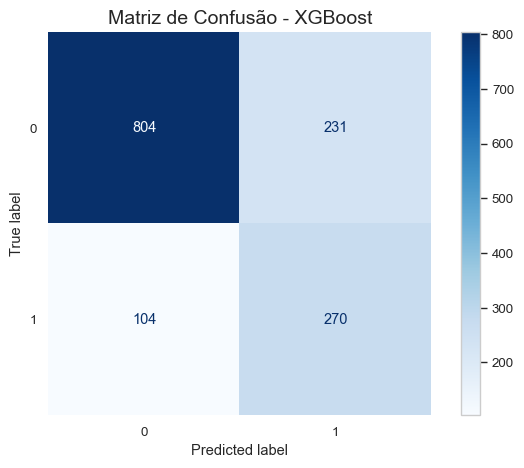

In [60]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    colorbar=True
)
plt.title("Matriz de Confus√£o - XGBoost", fontsize=14)
plt.gca().spines[:].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

Insight da matriz de confus√£o:

- O modelo acerta bem N√£o Churn (804), mas ainda confunde muitos como churn (231).

- Para Churn, detecta 260 corretamente, mas deixa escapar 114.

- Padr√£o: bom em prever reten√ß√£o, mas precisa melhorar na captura de churn.

<Figure size 600x500 with 0 Axes>

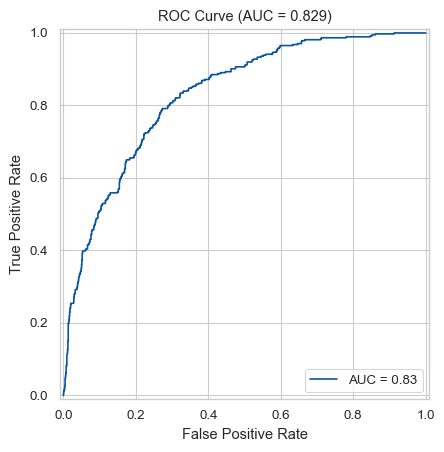

In [61]:
# Probabilidades previstas
y_proba = clf_xgb.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()

- O modelo apresenta AUC = 0.83, indicando boa capacidade de separa√ß√£o entre churn e n√£o churn.

<Figure size 600x500 with 0 Axes>

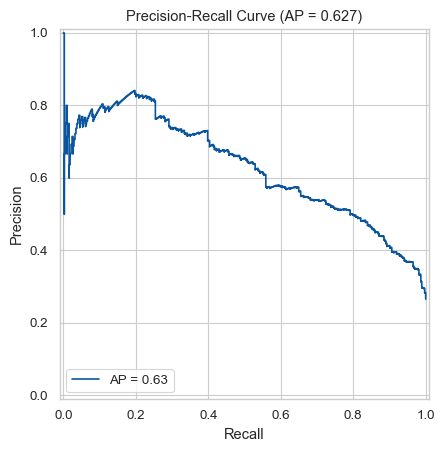

In [62]:
# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
PrecisionRecallDisplay(precision=prec, recall=rec, average_precision=ap).plot()
plt.title(f"Precision-Recall Curve (AP = {ap:.3f})")
plt.show()

- O modelo tem AP = 0.61, mostrando desempenho razo√°vel, mas ainda com perda de precis√£o conforme aumenta o recall na detec√ß√£o de churn.

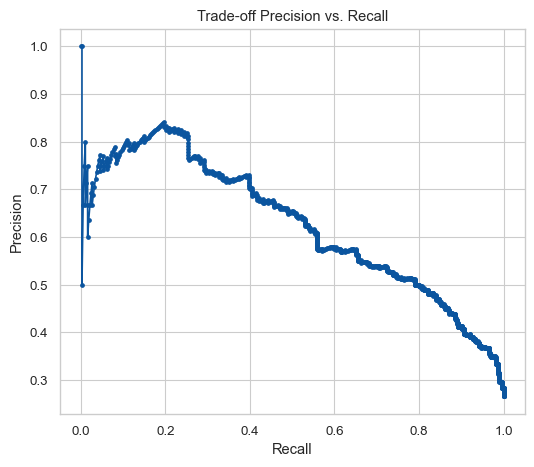

In [63]:
# Precis√£o x Recall
plt.figure(figsize=(6, 5))
plt.plot(rec, prec, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Trade-off Precision vs. Recall")
plt.grid(True)
plt.show()

- H√° um claro trade-off: aumentar recall melhora a captura de churns, mas reduz a precis√£o. O ponto √≥timo est√° em n√≠veis intermedi√°rios de recall (~0.3‚Äì0.5).

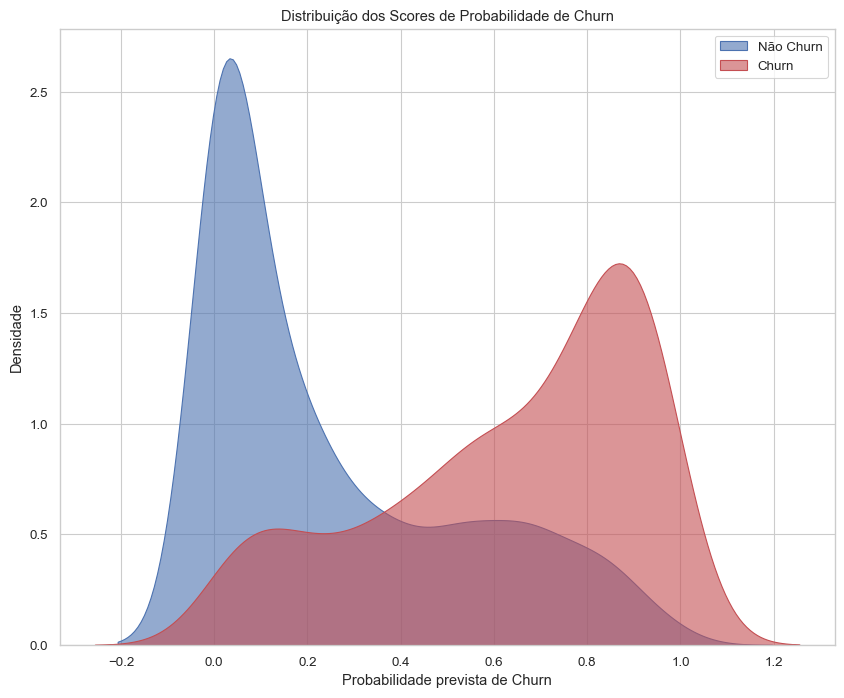

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(y_proba[y_test == 0], ax=ax, color="b", fill=True, alpha=0.6, label='N√£o Churn')
sns.kdeplot(y_proba[y_test == 1], ax=ax, color="r", fill=True, alpha=0.6, label='Churn')
plt.title("Distribui√ß√£o dos Scores de Probabilidade de Churn")
plt.xlabel("Probabilidade prevista de Churn")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

- Clientes N√£o Churn concentram-se em probabilidades baixas (<0.2), enquanto clientes Churn t√™m distribui√ß√£o mais espalhada (0.3‚Äì0.8).  O modelo separa razoavelmente as classes, mas com sobreposi√ß√£o significativa.

##### Interpreta√ß√£o do Output (Feature importance)

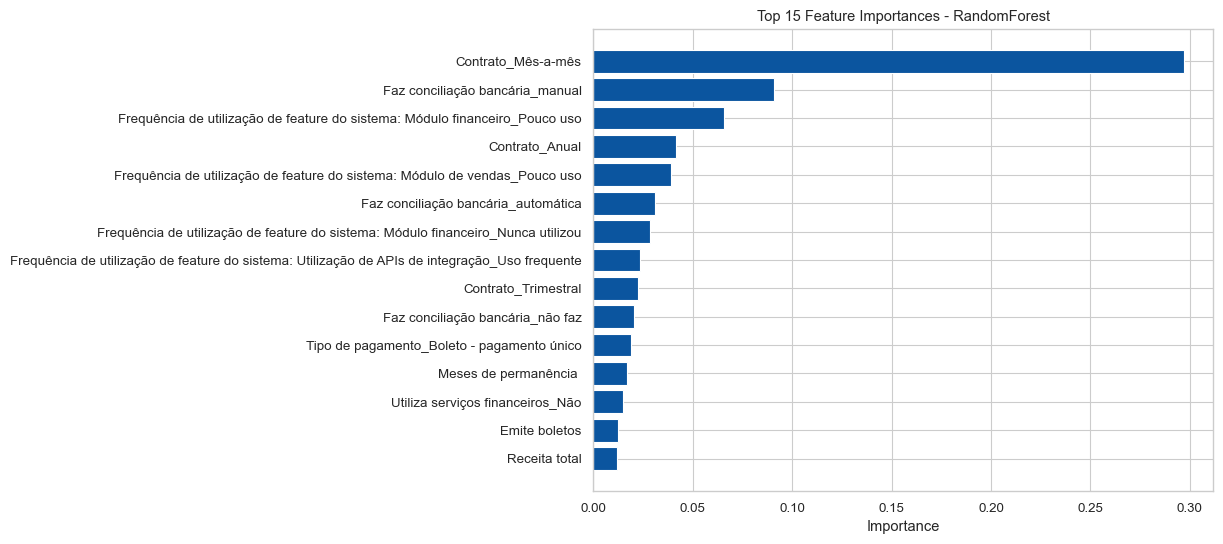

In [65]:
# Import√¢ncia das Features
ohe = clf_xgb.named_steps["preprocessor"].named_transformers_["cat"].named_steps["ohe"]
cat_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_names])
importances = clf_xgb.named_steps["classifier"].feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices][::-1], align="center")
plt.yticks(range(len(indices)), feature_names[indices][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances - RandomForest")
plt.show()

#### Experimento 1 ‚Äì Controlado pela empresa

##### Objetivo  
Mensurar o impacto **individual** de cada tipo de tratativa sobre o churn, em clientes considerados **alto risco** pelo modelo preditivo.

##### Desenho (A/B test multigrupos)
- **Popula√ß√£o-alvo:** clientes classificados pelo modelo com probabilidade de churn > X% (ex.: top 30%).  
- **Randomiza√ß√£o:** os clientes s√£o **aleatoriamente alocados** nos seguintes grupos:
  - **Grupo A:** desconto no contrato.  
  - **Grupo B:** treinamento assistido sobre a plataforma.  
  - **Grupo C:** contato ativo da equipe de relacionamento.  
  - **Grupo Controle:** nenhuma a√ß√£o (status quo).  
- **Per√≠odo de observa√ß√£o:** 3 a 6 meses ap√≥s interven√ß√£o.  

##### M√©trica de sucesso  
- **Taxa de churn por grupo**:  
  $$
  \text{Taxa de churn} = \frac{\text{Clientes que sa√≠ram}}{\text{Total do grupo}}
  $$  
- **Redu√ß√£o percentual de churn vs. grupo controle**:  
  $$
  \Delta = \frac{Churn_{controle} - Churn_{grupo}}{Churn_{controle}} \times 100
  $$  
- Testes estat√≠sticos: Qui-quadrado ou teste Z para diferen√ßas de propor√ß√µes ‚Üí validar signific√¢ncia.

##### Interpreta√ß√£o  
- Permite comparar a **efic√°cia isolada de cada a√ß√£o**.  
- Mostra qual estrat√©gia tem **maior impacto direto** na reten√ß√£o.  

---

#### Experimento 2 ‚Äì Decis√£o pelo time de neg√≥cios

##### Objetivo  
Avaliar a **efetividade do modelo em ambiente real**, quando a escolha da a√ß√£o fica a crit√©rio do time de neg√≥cios.

##### Desenho
- **Popula√ß√£o-alvo:** mesma (clientes com maior risco de churn).  
- **Interven√ß√£o:** lista de propens√£o entregue ao time de neg√≥cios.  
- **Execu√ß√£o:** a equipe decide a tratativa caso a caso (desconto, treinamento, contato).  
- **Grupo de compara√ß√£o:** clientes de risco similar **n√£o tratados**.  
- **Per√≠odo de observa√ß√£o:** 3 a 6 meses.  

##### M√©trica de sucesso  

- **Churn agregado da base tratada vs. base n√£o tratada**  

$$
\Delta_{global} = \frac{Churn_{nao\ tratado} - Churn_{tratado}}{Churn_{nao\ tratado}} \times 100
$$


- Possibilidade de segmentar m√©tricas por a√ß√£o escolhida, mas a prioridade √© medir o efeito **global** da solu√ß√£o.
  

##### Interpreta√ß√£o  
- Mede a **utilidade pr√°tica do modelo** na opera√ß√£o.  
- Capta n√£o apenas o poder preditivo, mas tamb√©m a **capacidade da √°rea de neg√≥cios em usar a informa√ß√£o de forma eficaz**.  

---

#### Resumo visual

| Experimento | Controle de a√ß√µes | Grupos | O que mede | Resultado esperado |
|-------------|------------------|--------|-------------|--------------------|
| 1 | Total (A/B test) | Desconto / Treinamento / Contato / Controle | Efic√°cia isolada de cada tratativa | Ranking de impacto |
| 2 | Nenhum (neg√≥cio escolhe) | Tratados vs. N√£o tratados | Efeito agregado da solu√ß√£o | Valida√ß√£o do modelo na pr√°tica |


Agora seguiremos a trabalhar com os modelos de experimentos e buscar entender os objetivos de n√©gocios. 
Onde no experimento 1 mediremos os impactos de diferentes ac√µes, onde buscamos como m√©trica de sucesso a redu√ß√£o percentual no churn.

No experimento 2 vamos medir a performance realista da solu√ß√£o, onde a m√©trica de sucesso √© ver o impacto da solu√ß√£o na base real.

### Experimento 1

#### Experimentos de Neg√≥cio(A/B Test)

In [66]:
# A/B Test para churn
np.random.seed(42)
n_clientes = 1000 
clientes = pd.DataFrame({"cliente_id": range(1, n_clientes+1)})
clientes["grupo"] = np.random.choice(
    ["Controle", "A_desconto", "B_treinamento", "C_contato"],
    size=n_clientes,
    p=[0.25, 0.25, 0.25, 0.25]
)

# Simular churn p√≥s-interven√ß√£o(essas taxas s√£o hipot√©ticas para simula√ß√£o)
taxas = {
    "Controle": 0.25,       # 25% de churn
    "A_desconto": 0.20,     # 20% de churn
    "B_treinamento": 0.18,  # 18% de churn
    "C_contato": 0.15       # 15% de churn
}

clientes["churn_pos"] = clientes["grupo"].map(
    lambda g: np.random.binomial(1, taxas[g])
)

# Calcular taxa de churn por grupo
resultados = clientes.groupby("grupo")["churn_pos"].mean().reset_index()
resultados.rename(columns={"churn_pos": "taxa_churn"}, inplace=True)

controle_churn = resultados.loc[resultados["grupo"]=="Controle", "taxa_churn"].values[0]
resultados["delta_vs_controle"] = (
    (controle_churn - resultados["taxa_churn"]) / controle_churn * 100
)
print("Taxas de churn por grupo:")
print(resultados)

# Teste estat√≠stico (Z-test para propor√ß√µes)
def teste_proporcao(grupo):
    contagem = np.array([
        clientes.loc[clientes["grupo"]==grupo, "churn_pos"].sum(),
        clientes.loc[clientes["grupo"]=="Controle", "churn_pos"].sum()
    ])
    nobs = np.array([
        clientes.loc[clientes["grupo"]==grupo].shape[0],
        clientes.loc[clientes["grupo"]=="Controle"].shape[0]
    ])
    stat, pval = proportions_ztest(contagem, nobs)
    return pval

print("\nTeste de signific√¢ncia vs. Controle:")
for g in ["A_desconto", "B_treinamento", "C_contato"]:
    pval = teste_proporcao(g)
    signif = "Significativo" if pval < 0.05 else "N√£o significativo"
    print(f"{g}: p-valor={pval:.4f} ‚Üí {signif}")

Taxas de churn por grupo:
           grupo  taxa_churn  delta_vs_controle
0     A_desconto    0.230769           7.347876
1  B_treinamento    0.173228          30.450112
2      C_contato    0.139918          43.824089
3       Controle    0.249071           0.000000

Teste de signific√¢ncia vs. Controle:
A_desconto: p-valor=0.6319 ‚Üí N√£o significativo
B_treinamento: p-valor=0.0340 ‚Üí Significativo
C_contato: p-valor=0.0019 ‚Üí Significativo


- Grupo A (Desconto): redu√ß√£o leve no churn, mas n√£o significativa (p = 0,63).

- Grupo B (Treinamento): queda de ~30% no churn, estatisticamente significativa (p = 0,034).

- Grupo C (Contato): maior impacto, com redu√ß√£o de ~44% no churn, altamente significativa (p = 0,0019).

A√ß√µes pr√°ticas: contato ativo e treinamento se mostraram as estrat√©gias mais eficazes na reten√ß√£o.

C:\Users\User\AppData\Local\Temp\ipykernel_4532\2395737375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


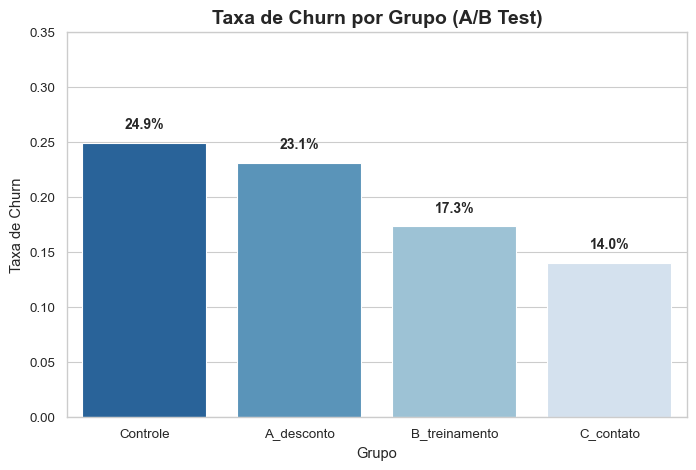

In [67]:
# Controle vs A, B, C
ordem = ["Controle", "A_desconto", "B_treinamento", "C_contato"]
plt.figure(figsize=(8,5))
sns.barplot(
    data=resultados,
    x="grupo",
    y="taxa_churn",
    order=ordem,
    palette="Blues_r"
)
for i, row in resultados.set_index("grupo").loc[ordem].reset_index().iterrows():
    plt.text(
        i, 
        row["taxa_churn"] + 0.01, 
        f"{row['taxa_churn']:.1%}", 
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )
plt.title("Taxa de Churn por Grupo (A/B Test)", fontsize=14, fontweight="bold")
plt.ylabel("Taxa de Churn")
plt.xlabel("Grupo")
plt.ylim(0, 0.35) 
plt.show()

- As estrat√©gias reduziram o churn em rela√ß√£o ao controle (24,9%). 
- O desconto teve efeito pequeno (23,1%, n√£o significativo), enquanto treinamento (17,3%) e principalmente contato ativo (14,0%) mostraram impacto relevante e estatisticamente significativo na reten√ß√£o

C:\Users\User\AppData\Local\Temp\ipykernel_4532\237975129.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


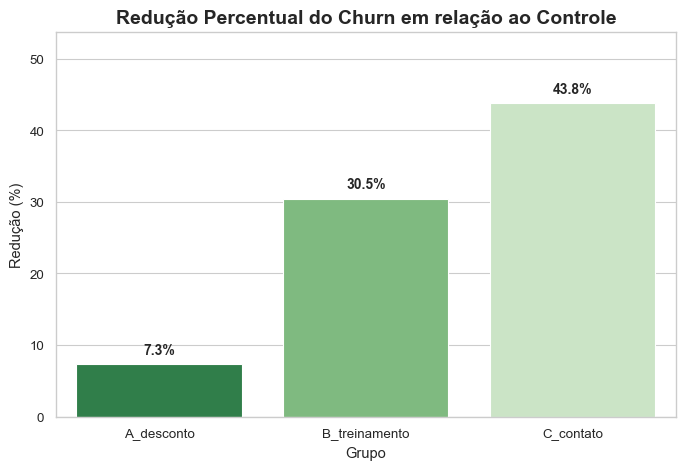

In [68]:
# Visualiza√ß√£o da redu√ß√£o percentual do churn (vs. Controle)
plt.figure(figsize=(8,5))
ordem = ["A_desconto", "B_treinamento", "C_contato"]
sns.barplot(
    data=resultados[resultados["grupo"].isin(ordem)],
    x="grupo",
    y="delta_vs_controle",
    order=ordem,
    palette="Greens_r"
)
for i, row in resultados[resultados["grupo"].isin(ordem)].set_index("grupo").loc[ordem].reset_index().iterrows():
    plt.text(
        i,
        row["delta_vs_controle"] + 1,
        f"{row['delta_vs_controle']:.1f}%",
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )
plt.title("Redu√ß√£o Percentual do Churn em rela√ß√£o ao Controle", fontsize=14, fontweight="bold")
plt.ylabel("Redu√ß√£o (%)")
plt.xlabel("Grupo")
plt.ylim(0, resultados["delta_vs_controle"].max() + 10) 
plt.show()

- O desconto teve efeito limitado (‚àí7,3%), enquanto treinamento reduziu o churn em ~30% e o contato ativo foi a estrat√©gia mais eficaz, com redu√ß√£o de ~44% em rela√ß√£o ao controle

### Experimento 2

In [69]:
# cria coluna bin√°ria: 1 = churn, 0 = n√£o churn
df["churn_real"] = df["Churn"].map({"Sim": 1, "N√£o": 0})

In [70]:
X_all = pd.concat([X_train, X_test])
clientes = pd.DataFrame({"cliente_id": X_all.index})
clientes["score_churn"] = clf_xgb.predict_proba(X_all)[:, 1]

top_risco = clientes["score_churn"].quantile(0.80)
clientes["alto_risco"] = clientes["score_churn"] >= top_risco

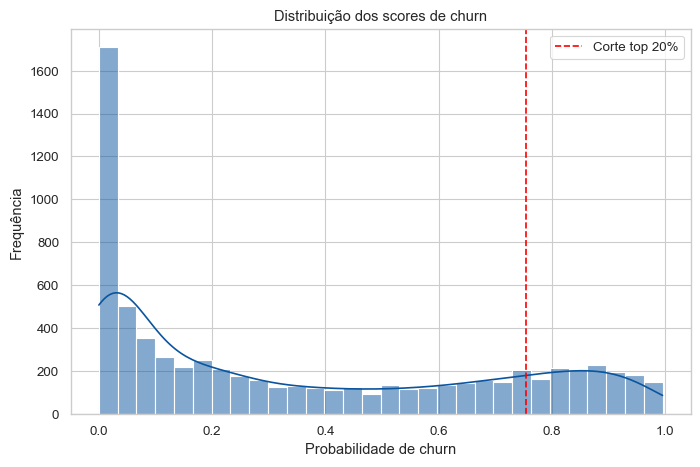

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(clientes["score_churn"], bins=30, kde=True)
plt.axvline(top_risco, color="red", linestyle="--", label="Corte top 20%")
plt.title("Distribui√ß√£o dos scores de churn")
plt.xlabel("Probabilidade de churn")
plt.ylabel("Frequ√™ncia")
plt.legend()
plt.show()

- A maioria dos clientes tem baixa probabilidade de churn, mas o modelo identifica um grupo relevante no top 20% com risco elevado (> ~0,75), ideal para a√ß√µes de reten√ß√£o direcionadas.

In [72]:
# simula√ß√£o de a√ß√µes escolhidas pelo time
acoes = ["desconto", "treinamento", "contato", None]
clientes.loc[clientes["alto_risco"], "acao"] = np.random.choice(
    acoes,
    size=clientes["alto_risco"].sum(),
    p=[0.3, 0.3, 0.2, 0.2]  # Ex: 80% tratados, 20% n√£o tratados
)
clientes["tratado"] = clientes["acao"].notna()

Na vida real, essa coluna ‚Äúa√ß√£o‚Äù viria do CRM ou do registro da √°rea de neg√≥cios ou outra ferramenta interna.

In [73]:
clientes = clientes.merge(
    df[["ID", "churn_real"]],
    left_on="cliente_id",
    right_on="ID",
    how="left"
)
clientes.drop(columns="ID", inplace=True)


In [74]:
churn_tratado = clientes.loc[clientes["tratado"], "churn_real"].mean()
churn_nao_tratado = clientes.loc[~clientes["tratado"], "churn_real"].mean()
delta_global = (churn_nao_tratado - churn_tratado) / churn_nao_tratado * 100

print(f"Churn tratado: {churn_tratado:.2%}")
print(f"Churn n√£o tratado: {churn_nao_tratado:.2%}")
print(f"Œî global: {delta_global:.2f}%")

Churn tratado: 27.39%
Churn n√£o tratado: 26.38%
Œî global: -3.81%


- As a√ß√µes de reten√ß√£o reduziram o churn de 27,39% ‚Üí 26,38%, uma queda modesta de ~3,8% no total. O impacto global foi pequeno, mas positivo.

In [75]:
# churn m√©dio por a√ß√£o
impacto_por_acao = (
    clientes.groupby("acao")["churn_real"]
    .mean()
    .reset_index()
    .rename(columns={"churn_real": "taxa_churn"})
)
print(impacto_por_acao)

          acao  taxa_churn
0      contato    0.297297
1     desconto    0.258140
2  treinamento    0.273399


- Contato: maior churn (29,7%) ‚Üí menos eficaz isoladamente.

- Treinamento: churn intermedi√°rio (27,3%).

- Desconto: melhor resultado, com menor churn (25,8%).

O desconto mostrou-se a a√ß√£o individual mais eficiente para reten√ß√£o.

In [76]:
count = [
    clientes.loc[clientes["tratado"], "churn_real"].sum(),
    clientes.loc[~clientes["tratado"], "churn_real"].sum()
]
nobs = [
    clientes["tratado"].sum(),
    (~clientes["tratado"]).sum()
]
stat, pval = proportions_ztest(count, nobs)
print(f"p-valor: {pval:.4f}")

p-valor: 0.4805


- O p-valor = 0,48 indica que n√£o h√° diferen√ßa estatisticamente significativa entre as taxas de churn das a√ß√µes testadas.

In [77]:
def teste_acao_vs_controle(acao):
    tratados = clientes[clientes["acao"] == acao]
    controle = clientes[clientes["acao"].isna()]

    count = [tratados["churn_real"].sum(), controle["churn_real"].sum()]
    nobs = [len(tratados), len(controle)]

    stat, pval = proportions_ztest(count, nobs)
    return pval

# calcular p-valor para cada a√ß√£o
impacto_por_acao["p_valor"] = impacto_por_acao["acao"].apply(
    lambda x: teste_acao_vs_controle(x) if x is not None else None
)
print(impacto_por_acao)

          acao  taxa_churn   p_valor
0      contato    0.297297  0.202005
1     desconto    0.258140  0.798861
2  treinamento    0.273399  0.669623


- Nenhuma a√ß√£o apresentou efeito estatisticamente significativo (p > 0,05). 
- Apesar de o desconto ter mostrado a menor taxa de churn (25,8%), a diferen√ßa n√£o √© conclusiva do ponto de vista estat√≠stico.